In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 200

In [6]:
coefficient_1 = 0.95
coefficient_2 = 0.95
def do_anharmonism_correction(x):
    if 1000 < x < 2000:
        x = x - 1000
        x = (x * coefficient_1) + 1000 * coefficient_1
    elif x > 2000:
        x = x - 2000
        x = (x * coefficient_2) + 2000 * coefficient_2
    return x

In [7]:
headers = ['freq', 'value']
gly = pd.read_csv('Глицин Fluka.CSV', names=headers)
gly_modified = pd.read_csv('Глицин модифиц.CSV', names=headers)
gly_calculated = pd.read_csv('zwitterion_glycine_ir2.txt', names=headers)
glyCalculatedAnd4Water = pd.read_csv('zwitterion_solv_ir.txt', names=headers)
TwoGlyCalculated = pd.read_csv('2zw_GLy_2ver_freq_ir.txt', names=headers)
TwoGlyCalculatedAnd4Water = pd.read_csv('2ZwGLY_water_freq_ir.txt', names=headers)
TwoGlyCalculatedAnd6Water = pd.read_csv('2ZwGLY_6water_freq_ir2.txt', names=headers)
FourGlyCalculatedAnd4Water = pd.read_csv('4ZW_GLY_4water_freq_ir.txt', names=headers)
FourGlyCalculatedAnd8Water = pd.read_csv('4ZW_GLY_8water_freq_ir.txt', names=headers)

calculated_list = [
    gly_calculated,
    glyCalculatedAnd4Water,
    TwoGlyCalculated,
    TwoGlyCalculatedAnd4Water,
    TwoGlyCalculatedAnd6Water,
    FourGlyCalculatedAnd4Water,
    FourGlyCalculatedAnd8Water
]

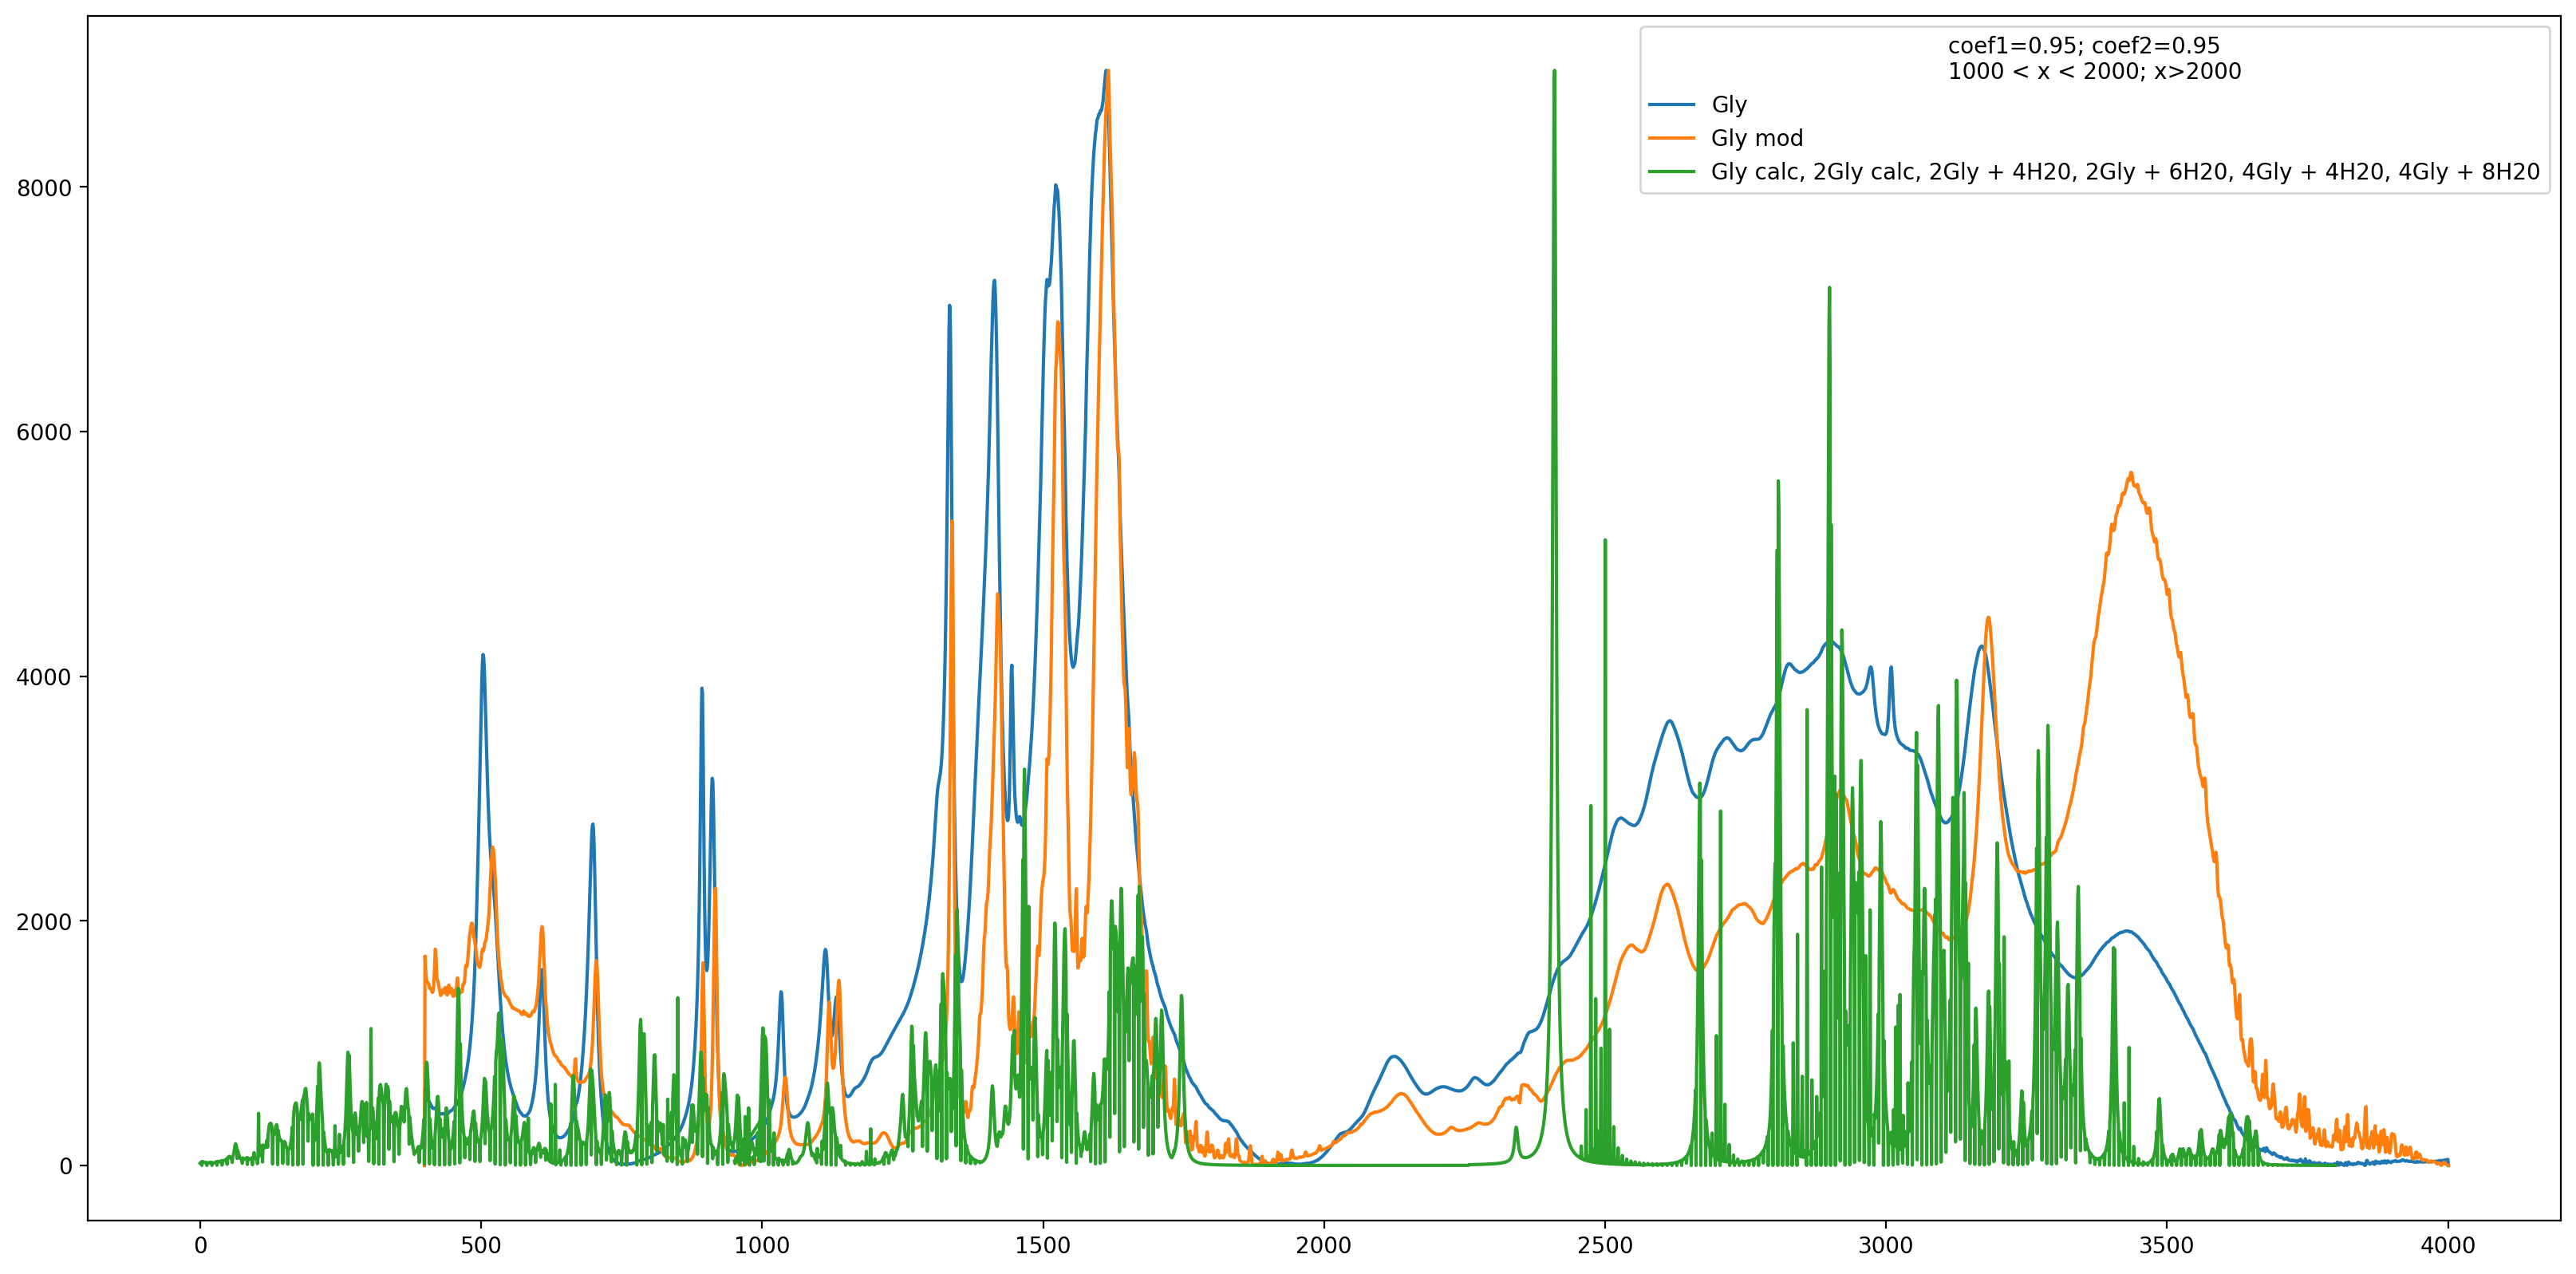

In [18]:
calculated_values = pd.Series(np.zeros(4000))

for data in calculated_list:
    i = 0
    for freq in data['freq']:
        if  data['value'][i] > calculated_values[int(freq)]:
            calculated_values[int(freq)] = data['value'][i]
        i = i + 1

plt.plot(gly['freq'], gly['value'] * calculated_values.max())
plt.plot(gly_modified['freq'], gly_modified['value'] * calculated_values.max())
plt.plot(gly_calculated['freq'].map(lambda x: do_anharmonism_correction(x)), calculated_values)
plt.legend(['Gly', 'Gly mod', 'Gly calc, 2Gly calc, 2Gly + 4H20, 2Gly + 6H20, 4Gly + 4H20, 4Gly + 8H20'], title = 'coef1=' + str(.95) + "; " + "coef2=" + str(0.95) + "\n1000 < x < 2000; x>2000")
plt.show()

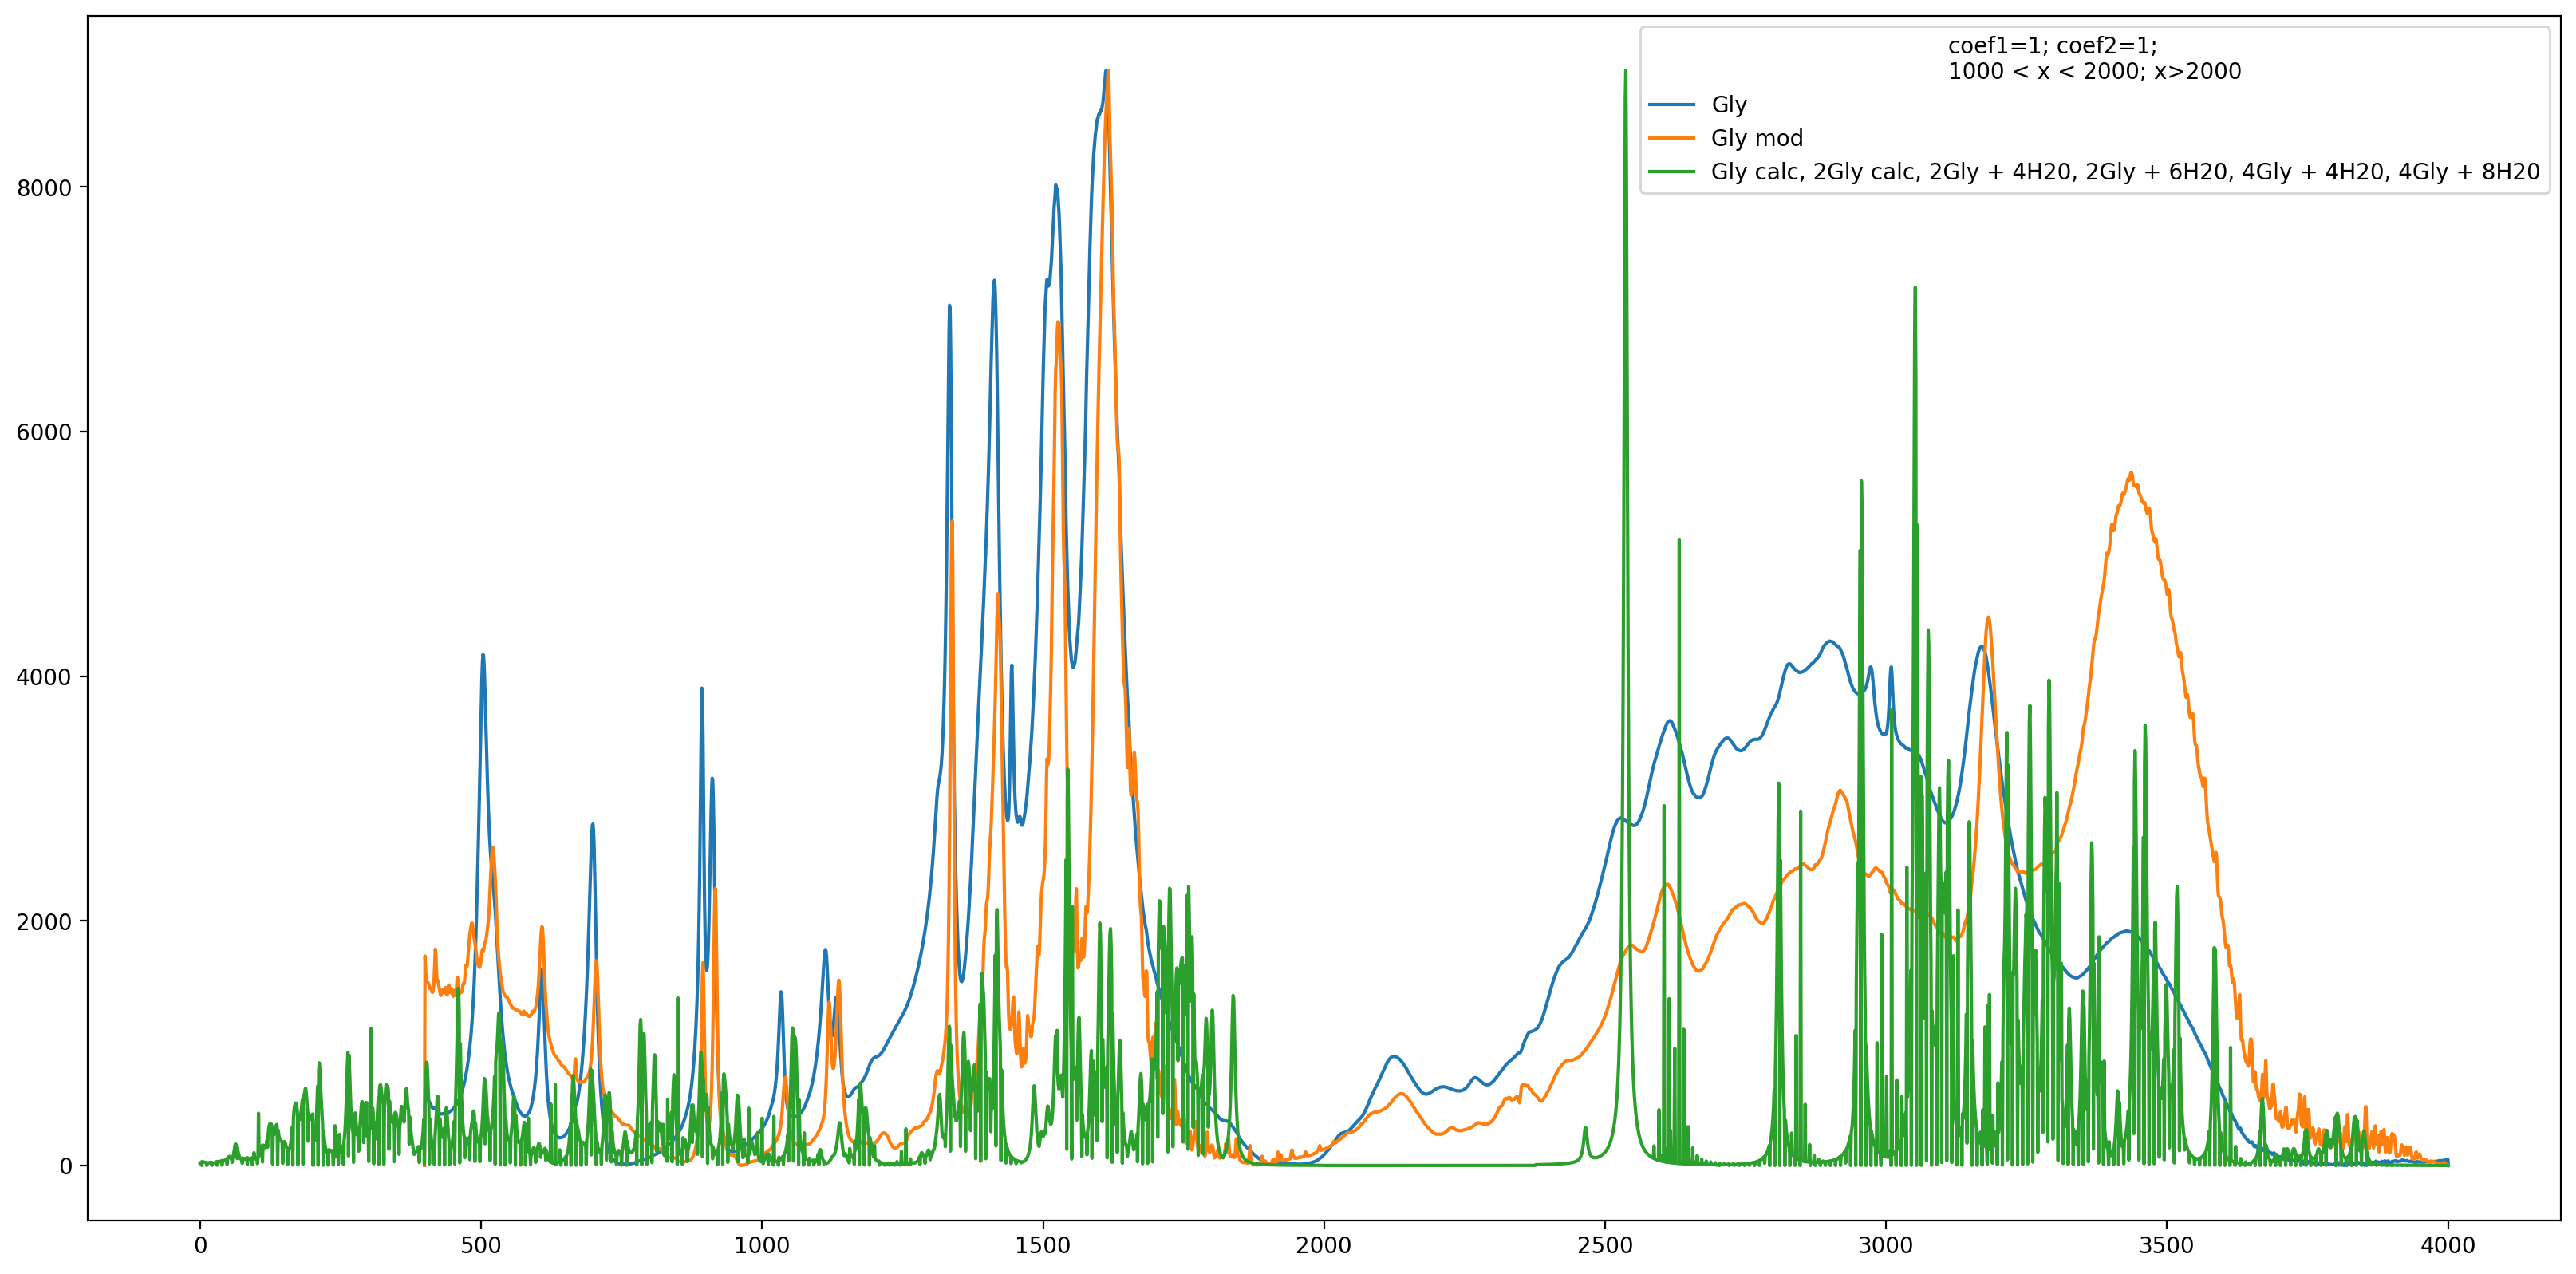

In [17]:
calculated_values = pd.Series(np.zeros(4000))

for data in calculated_list:
    i = 0
    for freq in data['freq']:
        if  data['value'][i] > calculated_values[int(freq)]:
            calculated_values[int(freq)] = data['value'][i]
        i = i + 1

plt.plot(gly['freq'], gly['value'] * calculated_values.max())
plt.plot(gly_modified['freq'], gly_modified['value'] * calculated_values.max())
plt.plot(gly_calculated['freq'], calculated_values)
plt.legend(['Gly', 'Gly mod', 'Gly calc, 2Gly calc, 2Gly + 4H20, 2Gly + 6H20, 4Gly + 4H20, 4Gly + 8H20'], title = 'coef1=' + str(1) + "; " + "coef2=" + str(1) + "; \n1000 < x < 2000; x>2000")
plt.show()

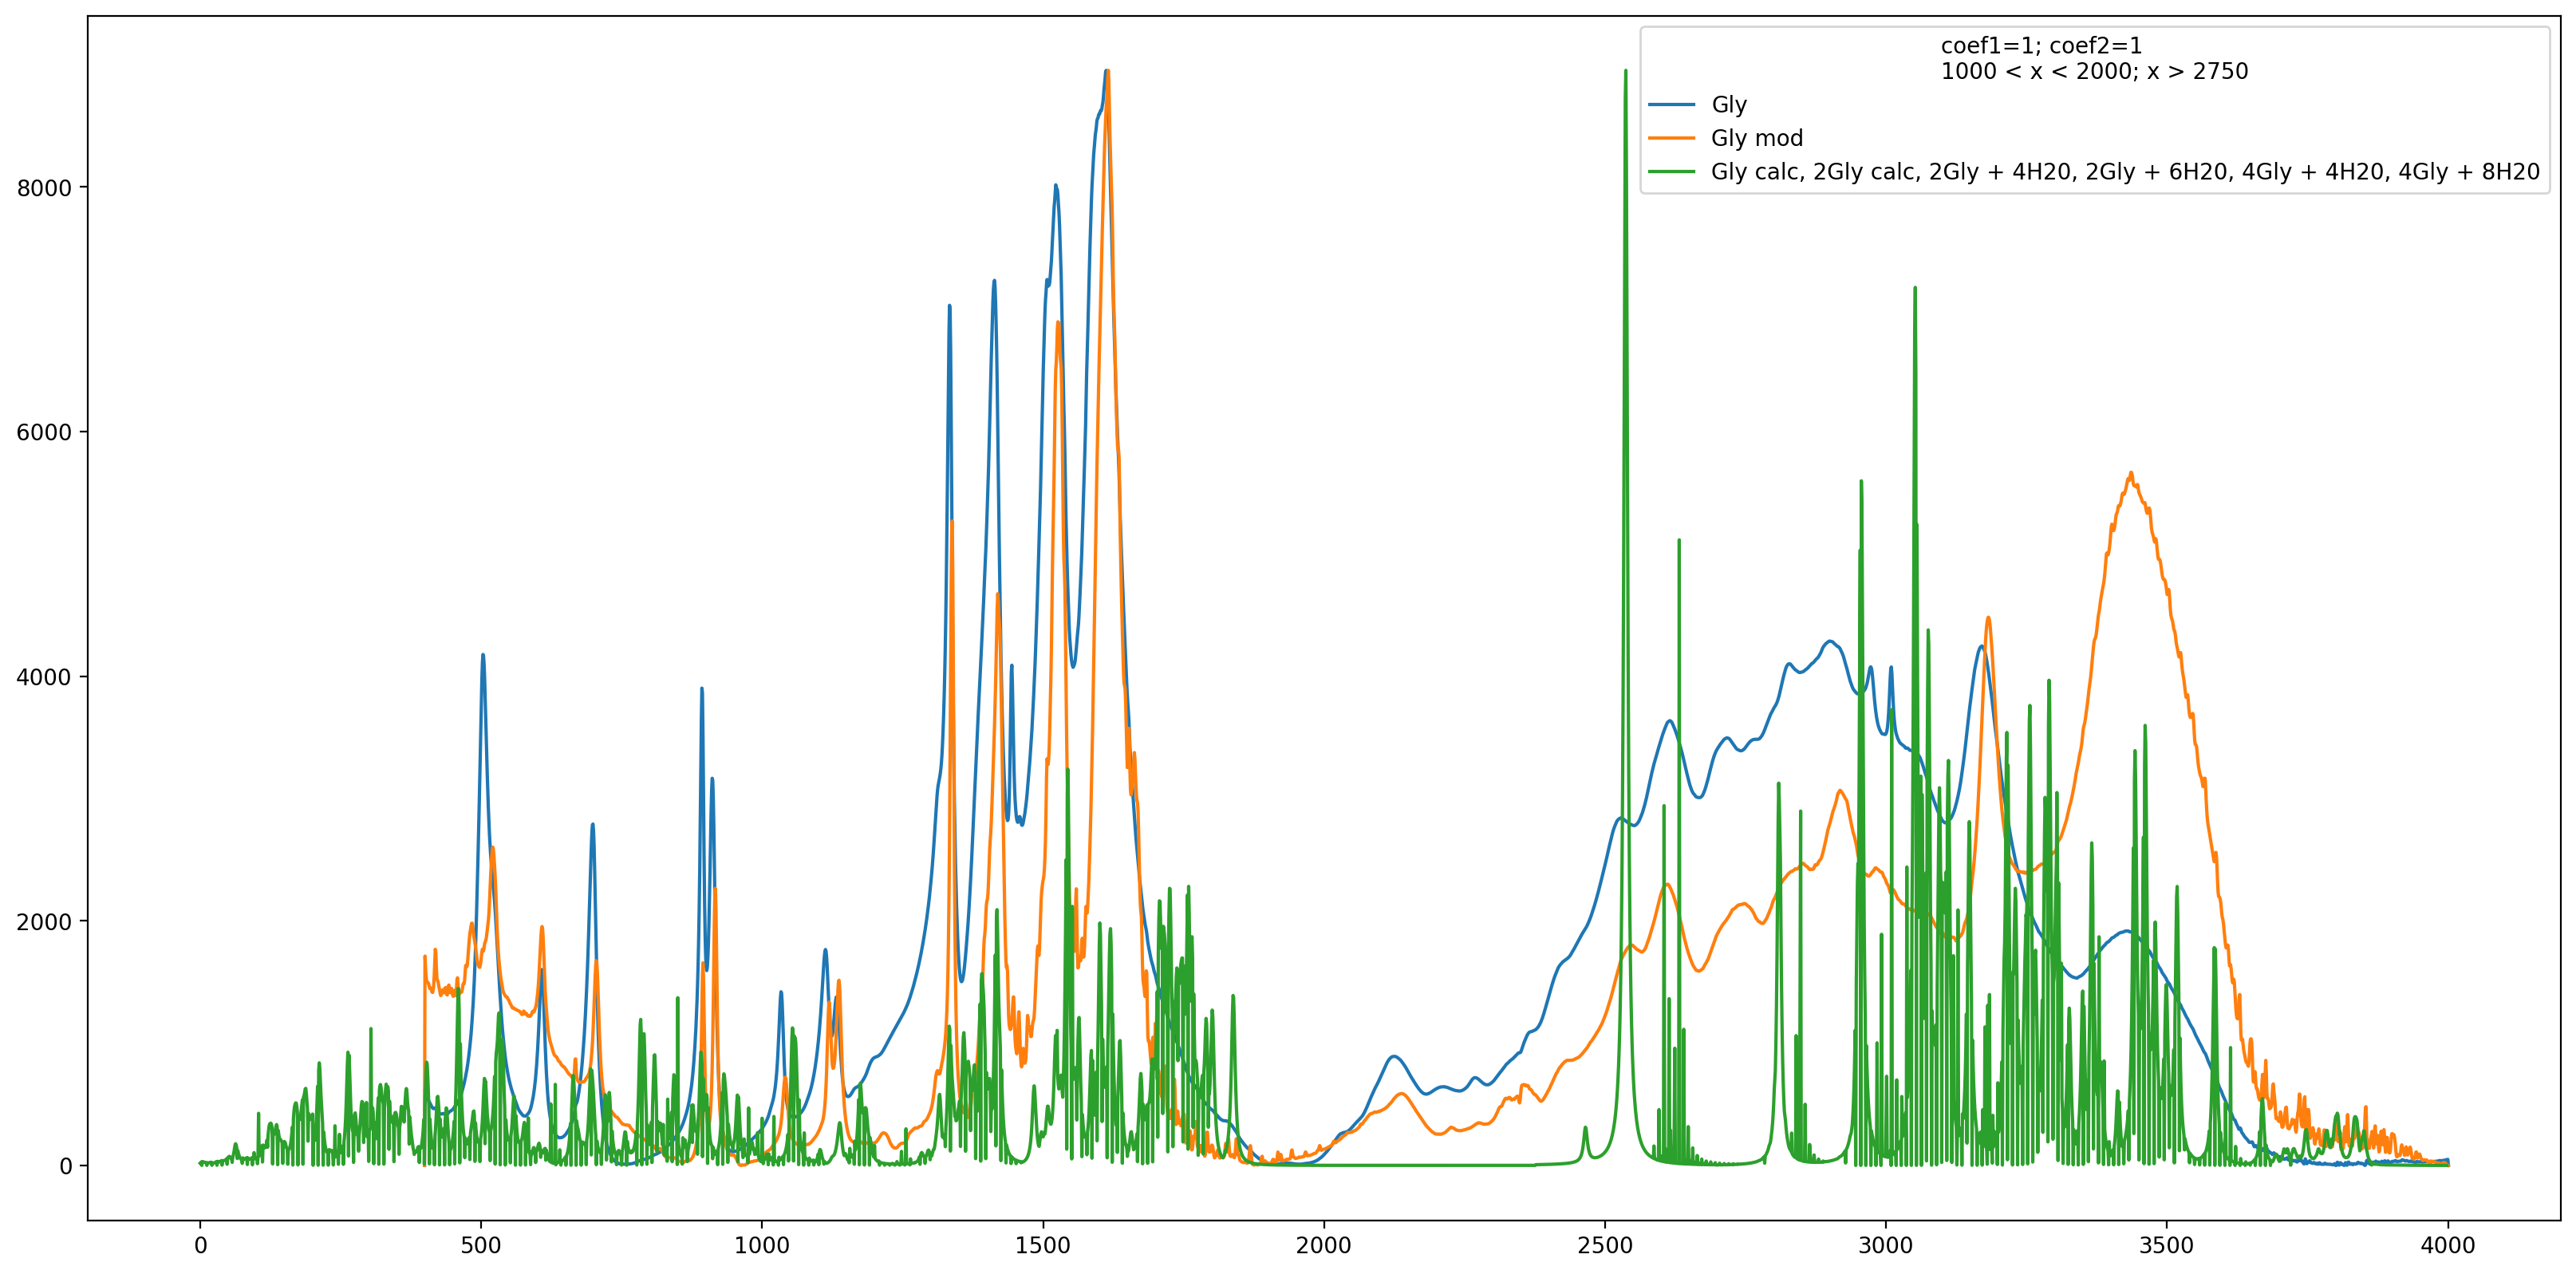

In [21]:
coefficient_1 = 0.95
coefficient_2 = 0.972

def do_anharmonism_correction(x):
    if 1000 < x < 2000:
        x = x - 1000
        x = (x * coefficient_1) + 1000 * coefficient_1
    elif x > 2750:
        x = x - 2750
        x = (x * coefficient_2) + 2750 * coefficient_2
    return x

used_freqs = set()
calculated_values = pd.Series(np.zeros(4000))
for data in calculated_list:
    i = 0
    for freq in data['freq']:
        if  data['value'][i] > calculated_values[int(freq)]:
            used_freqs.add(int(freq))
            calculated_values[int(freq)] = data['value'][i]
        i = i + 1

list_freqs = list(used_freqs)
g_calculated_values = pd.Series(list_freqs)
for i in range(0, len(list_freqs)):
    g_calculated_values[i] = calculated_values[list_freqs[i]]

plt.plot(gly['freq'], gly['value'] * calculated_values.max())
plt.plot(gly_modified['freq'], gly_modified['value'] * calculated_values.max())
# plt.plot(pg_calculated_values.map(lambda x: do_anharmonism_correction(x)), calculated_values)
plt.plot(list_freqs, g_calculated_values)
plt.legend(['Gly', 'Gly mod', 'Gly calc, 2Gly calc, 2Gly + 4H20, 2Gly + 6H20, 4Gly + 4H20, 4Gly + 8H20'], title = 'coef1=' + str(1) + "; " + "coef2=" + str(1) + "\n1000 < x < 2000; x > 2750")
plt.show()